In [ ]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Instagram data.csv',encoding = "ISO-8859-1")
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...





**Q.1: Show column names and have a look at their info.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


**Q.2: Show the descriptive statistics of the data**

In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


**Q.3: Check if your data contains any missing values:**

In [ ]:
data.dtypes

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object

In [ ]:
data.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

**Q.4: When you start exploring your data, always start by exploring the main feature of your data. For
 example, as we are working on a dataset based on Instagram Reach, we should start by exploring the
 feature that contains data about reach. In our data, the Impressions column contains the data about the
 reach of an Instagram post. So let’s have a look at the distribution of the Impressions:**

In [ ]:
px.histogram(data,x='Impressions',nbins=9)

In [ ]:
fig = px.line(data, y='Impressions')
fig.show()

### Q.6: Have a look at all the metrics like Likes, Saves, and Follows from each post over time

In [ ]:
fig = px.line(data, y=['Likes','Saves','Follows'])
fig.show()

In [ ]:
cols_sources = data.columns[1:5]
cols_sources[0]

'From Home'

In [ ]:

Values = []
for i in cols_sources:
  sum = data[i].sum()
  Values.append(sum)
Values

[294619, 224614, 128294, 20360]

In [ ]:
fig = px.pie(
    values=Values,
    names=['From Home','From Hashtags','From Explore','From Other'],

)
fig.show()

In [ ]:
cols_engag = data.columns[5:9]
cols_engag

Index(['Saves', 'Comments', 'Shares', 'Likes'], dtype='object')

In [ ]:
engag_values=[]
for i in cols_engag:
  engag_values.append(data[i].sum())
engag_values


[18244, 793, 1114, 20680]

In [ ]:
fig = px.pie(
    values=engag_values,
    names=['Saves','Comments','Shares','Likes'],
    hole = 0.3,
    color = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7"]
)
fig.show()

### Q.9: Have a look at the relationship between the number of profile visits and follows as shown

In [ ]:
fig = px.scatter(
    data,
    x='Profile Visits',
    y='Follows',
    trendline="ols",
    title = "Follows 'Vs' Profile visits"
)
fig.show()

### Q.No 10: Have a look at the type of hashtags used in the posts using a wordcloud

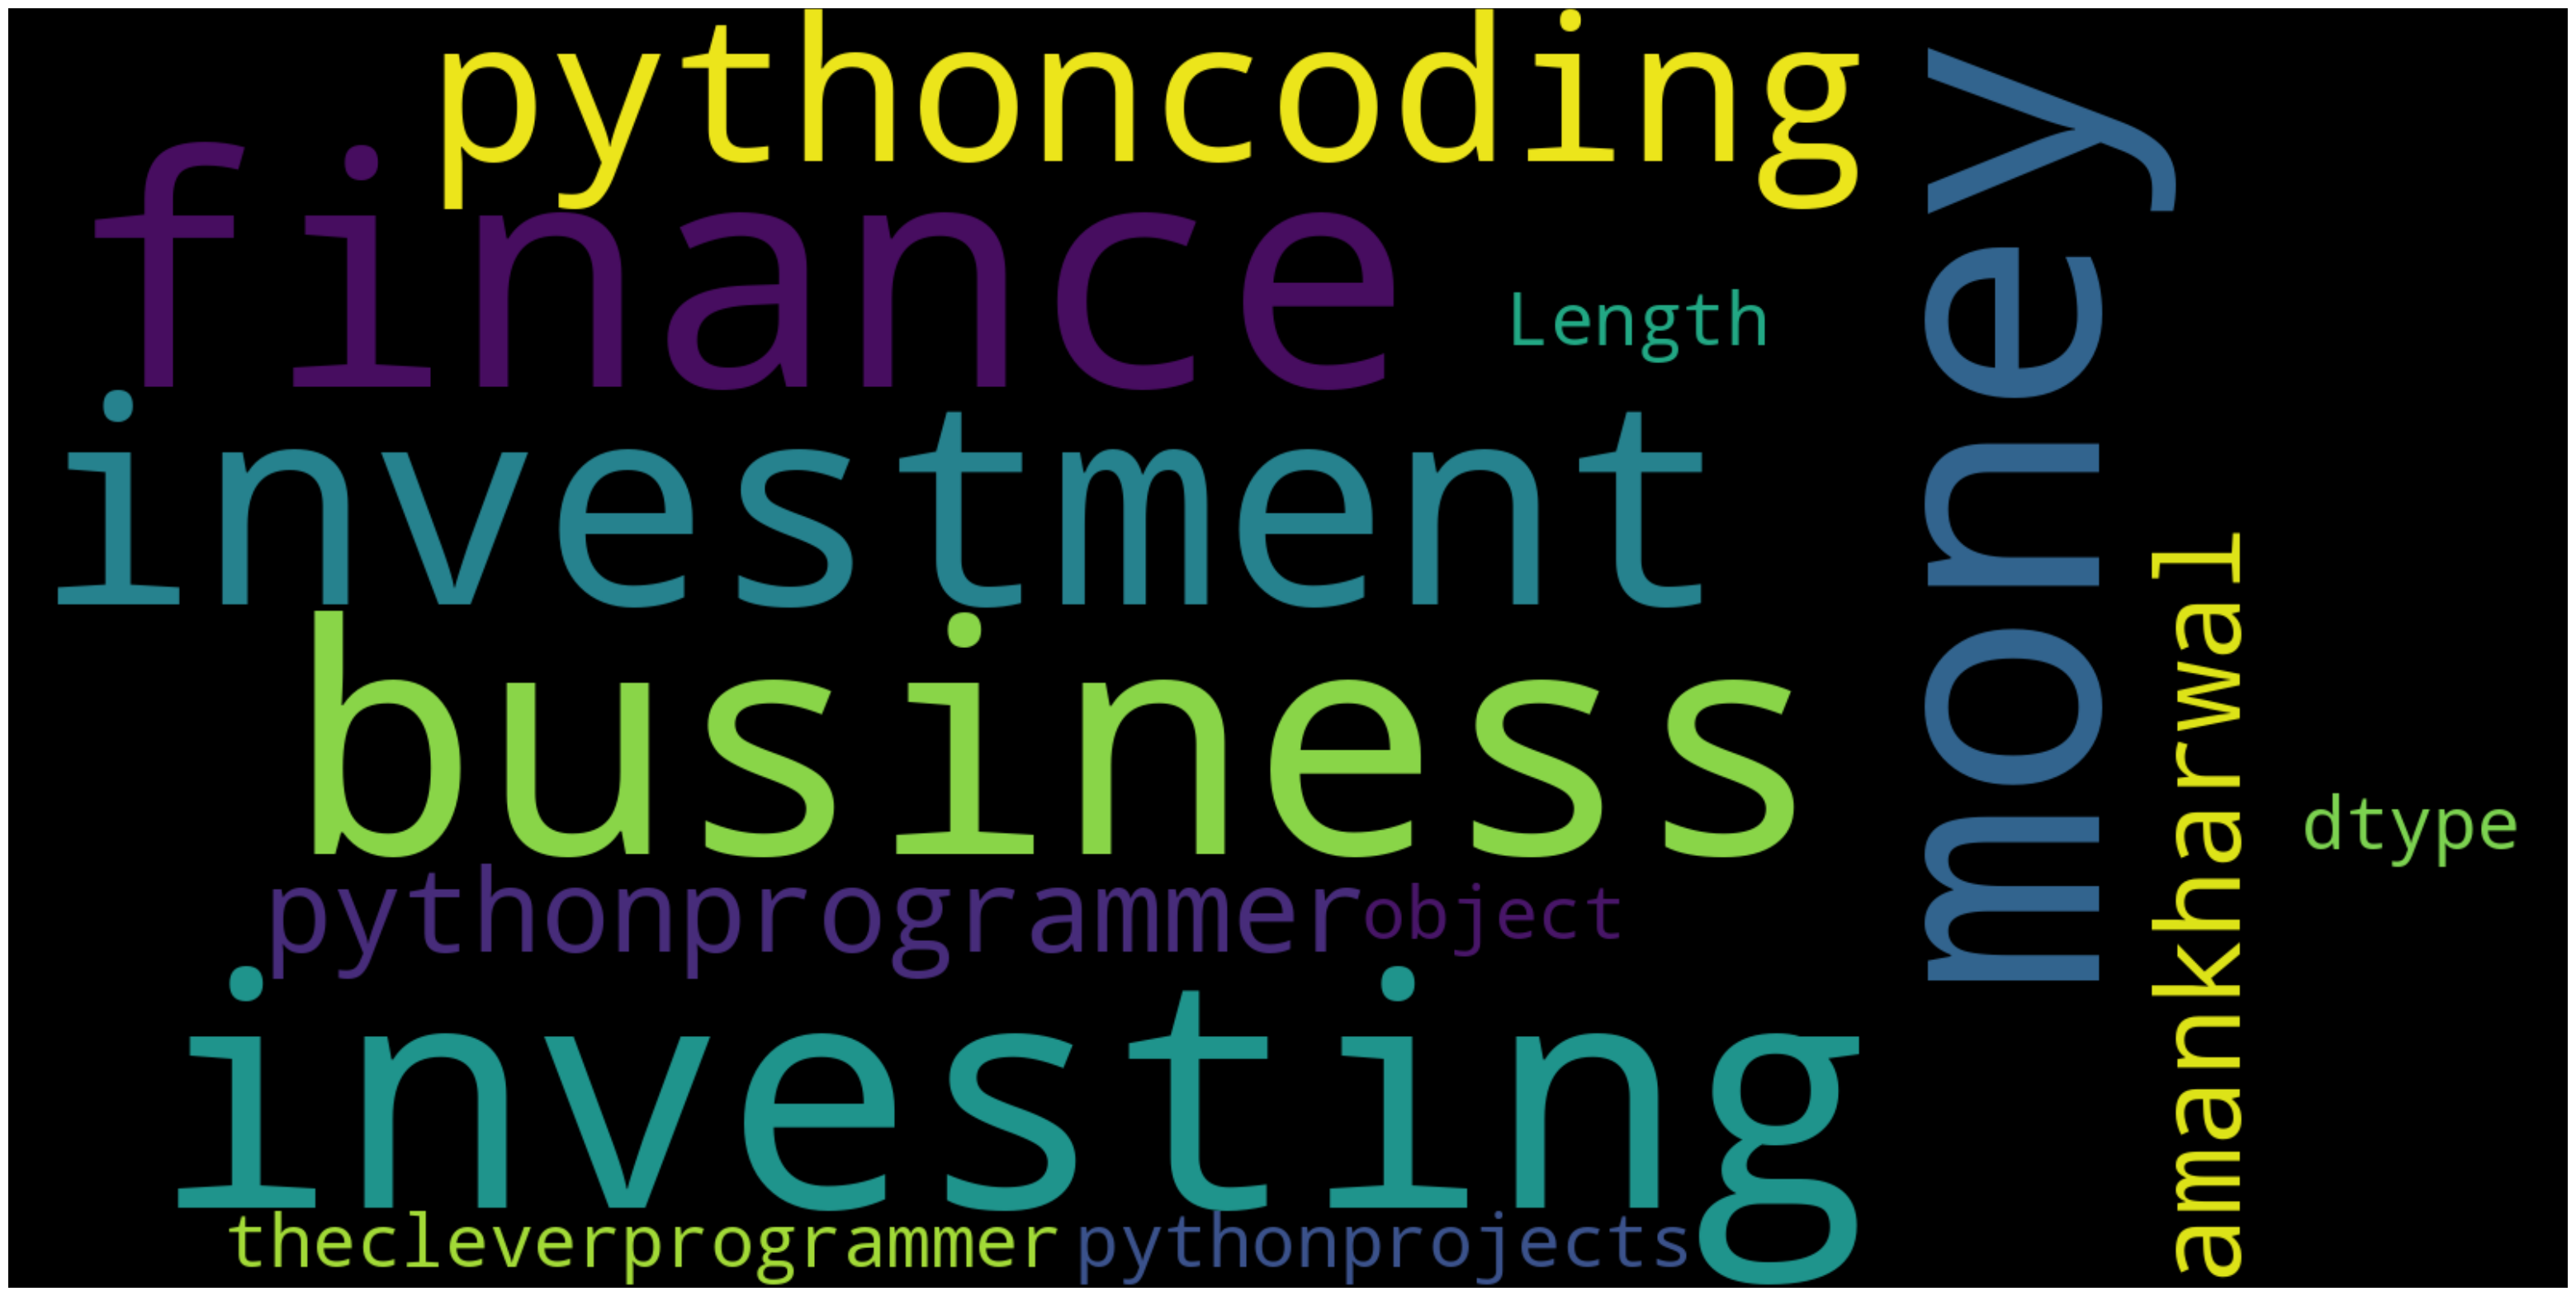

In [ ]:
wordcloud = WordCloud(
    width=1600,
    height=800,
    max_font_size=200,
    max_words=50,
    collocations=False,
    background_color='black'
    ).generate(hashtags)

plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
if not isinstance(hashtags, str):
  hashtags = str(hashtags)

### Q.11:  Have a look at the correlation between all the features

In [ ]:
fig = px.imshow(
    data[0:12].corr(),
    text_auto =True,
    width=1200, height=800
    )
fig.show()

<ipython-input-25-10a7c43e5b31>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
fig = px.histogram(
    data,
    x='Hashtags',
    title = "Hashtags Distribution.."
)
fig.show()

In [ ]:
 data['Hashtags'][0]

'#finance\xa0#money\xa0#business\xa0#investing\xa0#investment\xa0#trading\xa0#stockmarket\xa0#data\xa0#datascience\xa0#dataanalysis\xa0#dataanalytics\xa0#datascientist\xa0#machinelearning\xa0#python\xa0#pythonprogramming\xa0#pythonprojects\xa0#pythoncode\xa0#artificialintelligence\xa0#ai\xa0#dataanalyst\xa0#amankharwal\xa0#thecleverprogrammer'

In [ ]:
data['hashtags_coutn'] = data['Hashtags'].apply(lambda twt : re.findall(r"#(\w+)", twt))
data['hashtags_coutn'][0][0]

'finance'

In [ ]:
all_hashtags = []
for i in range(data['Hashtags'].count()):
  for j in range(len(data['hashtags_coutn'][i])):
    all_hashtags.append(data['hashtags_coutn'][i][j])


In [ ]:
all_hashtags

['finance',
 'money',
 'business',
 'investing',
 'investment',
 'trading',
 'stockmarket',
 'data',
 'datascience',
 'dataanalysis',
 'dataanalytics',
 'datascientist',
 'machinelearning',
 'python',
 'pythonprogramming',
 'pythonprojects',
 'pythoncode',
 'artificialintelligence',
 'ai',
 'dataanalyst',
 'amankharwal',
 'thecleverprogrammer',
 'healthcare',
 'health',
 'covid',
 'data',
 'datascience',
 'dataanalysis',
 'dataanalytics',
 'datascientist',
 'machinelearning',
 'python',
 'pythonprogramming',
 'pythonprojects',
 'pythoncode',
 'artificialintelligence',
 'ai',
 'dataanalyst',
 'amankharwal',
 'thecleverprogrammer',
 'data',
 'datascience',
 'dataanalysis',
 'dataanalytics',
 'datascientist',
 'machinelearning',
 'python',
 'pythonprogramming',
 'pythonprojects',
 'pythoncode',
 'artificialintelligence',
 'ai',
 'deeplearning',
 'machinelearningprojects',
 'datascienceprojects',
 'amankharwal',
 'thecleverprogrammer',
 'machinelearningmodels',
 'python',
 'pythonprogrammi

In [ ]:
test_list = [1, 3, 5, 6, 3, 5, 6, 1]
print ("The original list is : " + str(test_list))

res = []
for i in test_list:
    if i not in res:
        res.append(i)
res =  np.sum(res)

print ("The unique elements summation : " + str(res))

The original list is : [1, 3, 5, 6, 3, 5, 6, 1]
The unique elements summation : 15


In [ ]:
string_list = ["apple", "banana", "apple", "orange", "banana", "apple"]

counts = {}

for item in all_hashtags:
    counts[item] = counts.get(item, 0) + 1

for item, count in counts.items():
    print(f"{item}: {count}")


finance: 4
money: 4
business: 16
investing: 4
investment: 3
trading: 3
stockmarket: 3
data: 88
datascience: 94
dataanalysis: 77
dataanalytics: 87
datascientist: 83
machinelearning: 97
python: 109
pythonprogramming: 95
pythonprojects: 90
pythoncode: 78
artificialintelligence: 89
ai: 91
dataanalyst: 12
amankharwal: 117
thecleverprogrammer: 117
healthcare: 3
health: 3
covid: 3
deeplearning: 75
machinelearningprojects: 43
datascienceprojects: 43
machinelearningmodels: 7
pythonlearning: 19
pythondeveloper: 19
pythoncoding: 19
pythonprogrammer: 19
datavisualization: 19
bigdata: 20
dataviz: 5
analytics: 16
technology: 25
programming: 26
statistics: 14
coding: 24
businessintelligence: 6
datamining: 6
tech: 23
computerscience: 21
tableau: 2
database: 7
algorithm: 9
algorithms: 9
machinelearningalgorithms: 13
ml: 8
softskills: 1
stocks: 2
forex: 2
candlestick: 2
candlestickcharts: 2
pythonbooks: 1
bookstagram: 1
powerbi: 4
dataanalysisprojects: 3
businessanalytics: 3
neuralnetwork: 8
neuralnetwo

In [ ]:
hashtags = data['Hashtags'].str.split(expand=True).stack()

hashtag_counts = hashtags.value_counts()

hashtag_counts_df = pd.DataFrame({'Hashtag': hashtag_counts.index, 'Count': hashtag_counts.values})

fig = px.bar(hashtag_counts_df, x='Hashtag', y='Count', title="Distribution of Hashtags")

fig.update_layout(
    xaxis_title="Hashtags",
    yaxis_title="Count",
)

fig.show()


In [ ]:
hashtags = data['Hashtags'].str.split(expand=True).stack()

hashtags.index = hashtags.index.droplevel(-1)

likes_by_hashtag = pd.concat([hashtags, data['Likes']], axis=1)
likes_by_hashtag.columns = ['Hashtag', 'Likes']

likes_distribution = likes_by_hashtag.groupby('Hashtag')['Likes'].sum().reset_index()

likes_distribution = likes_distribution.sort_values(by='Likes', ascending=False)

fig = px.bar(likes_distribution, x='Hashtag', y='Likes', title="Distribution of Likes by Hashtag")

fig.update_layout(
    xaxis_title="Hashtags",
    yaxis_title="Total Likes",
    xaxis={'categoryorder':'total descending'}
)

fig.show()


In [ ]:
hashtags = data['Hashtags'].str.split(expand=True).stack()

hashtags.index = hashtags.index.droplevel(-1)

Impressions_by_hashtag = pd.concat([hashtags, data['Impressions']], axis=1)
Impressions_by_hashtag.columns = ['Hashtag', 'Impressions']

likes_distribution = Impressions_by_hashtag.groupby('Hashtag')['Impressions'].sum().reset_index()

likes_distribution = likes_distribution.sort_values(by='Impressions', ascending=False)

fig = px.bar(likes_distribution, x='Hashtag', y='Impressions', title="Distribution of Impressions by Hashtag")

fig.update_layout(
    xaxis_title="Hashtags",
    yaxis_title="Total Impressions",
    xaxis={'categoryorder':'total descending'} # Order the x-axis by total likes
)

fig.show()
